In [1]:
import numpy

In [2]:
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [3]:
import os
distance_file = os.path.join("data", "distance_data_headers.csv")

In [4]:
distances = numpy.genfromtxt(fname=distance_file, delimiter=",", dtype="unicode")

In [5]:
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [6]:
headers = distances[0]

In [7]:
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [8]:
data = distances[1:]

In [9]:
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [10]:
data = data.astype(numpy.float)

In [11]:
data[:, :]

array([[1.00000e+00, 8.95420e+00, 5.80240e+00, 1.15478e+01, 9.95570e+00],
       [2.00000e+00, 8.61810e+00, 6.09420e+00, 1.39594e+01, 1.16945e+01],
       [3.00000e+00, 9.00660e+00, 6.06370e+00, 1.30924e+01, 1.13043e+01],
       ...,
       [9.99800e+03, 8.66250e+00, 7.73060e+00, 9.54690e+00, 1.03063e+01],
       [9.99900e+03, 9.24560e+00, 7.88860e+00, 9.81510e+00, 1.07564e+01],
       [1.00000e+04, 8.81350e+00, 7.91700e+00, 9.95170e+00, 1.07848e+01]])

In [12]:
data[:, 0]

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 9.998e+03, 9.999e+03,
       1.000e+04])

In [13]:
data[0, :]

array([ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557])

In [14]:
#data[0, [0, 1] ]

In [15]:
#data[:, [0, 1]]

In [16]:
#ncols = len(data[0,:])

#print(ncols)



In [17]:
#for i in range(1, ncols):        
#    col = data[:,i]
#    avg = numpy.mean(col)
    
    #print(F" Column = {i} \t Average value = {avg}")

In [21]:
import matplotlib.pyplot as plt

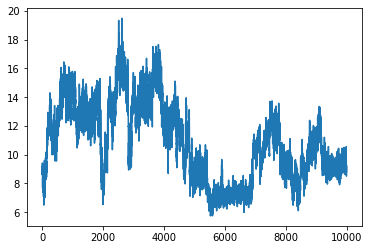

In [22]:
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(data[:, 1])

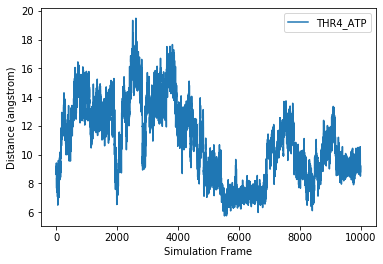

In [25]:
sample = headers[1]

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,1], label=sample)
plt.legend()

plt.savefig(F'{sample}.png', dpi=300)

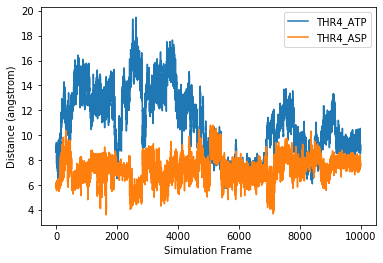

In [26]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()
plt.savefig('two_samples.png')

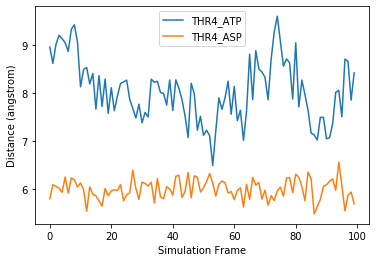

In [32]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:100,1], label=headers[1])
plt.plot(data[:100,2], label=headers[2])
plt.legend()
plt.savefig('two_samples.png')

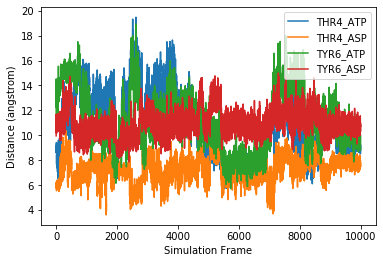

In [34]:
for col in range(1, len(headers)):
    fig = plt.plot(data[:,col], label=headers[col])
plt.legend()

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.savefig('all_samples.png')

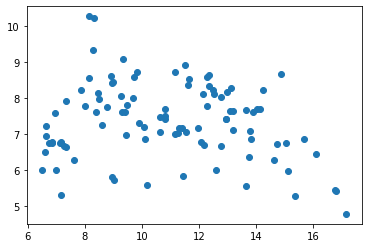

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data[::100,1], data[::100,2], 'o')